/var/folders/qn/sm1d7syd0gndlwx_msbwkpxc0000gn/T/ipykernel_229/1598221824.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize( (W,L), resample=Image.ANTIALIAS )
/var/folders/qn/sm1d7syd0gndlwx_msbwkpxc0000gn/T/ipykernel_229/1598221824.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize( (W,L), resample=Image.ANTIALIAS )


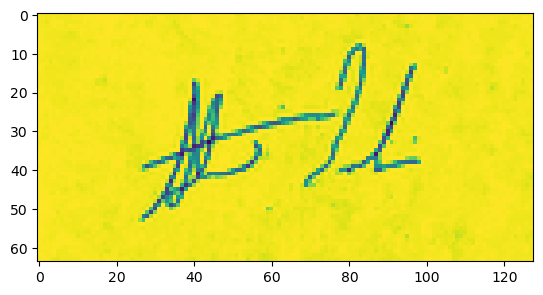

In [1]:
from diy import get_stu
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import numpy as np
from PIL import Image
from preprocess import get_siamese_data
L = 64
W = 128
base_path = './data/diy/'
genuine_paths = [base_path+'stu_stu1.jpg', base_path+'stu_stu2.jpg']
forged_paths = [base_path+'josh_stu.jpg']
person_images = []
person_labels = []
for file in genuine_paths:
    image = Image.open(file).convert('L')
    image = image.resize( (W,L), resample=Image.ANTIALIAS )
    im_data = np.asarray(image).reshape((W,L,1))
    person_images.append(im_data)
    person_labels.append(0)

for file in forged_paths:
    image = Image.open(file).convert('L')
    image = image.resize( (W,L), resample=Image.ANTIALIAS )
    im_data = np.asarray(image).reshape((W,L,1))
    person_images.append(im_data)
    person_labels.append(1)
X1= person_images
plt.imshow(image)
plt.show()
# pairs, labels = make_siamese_pairs(np.array(person_images), np.array(person_labels))
pairs, labels = get_siamese_data(genuine_paths, forged_paths)
X1, Y1 = np.array(pairs), np.array(labels)

# x,y = get_stu()
# print(x.shape)
# print(y)
# print("LEFT IMAGES")
# for image in X1[:,0]:
#     plt.imshow(np.squeeze(image))
#     plt.show()
#     break

# print("RIGHT IMAGES")
# for image in X1[:,1]:
#     plt.imshow(np.squeeze(image))
#     plt.show()
#     break

In [2]:
from models.transformer import get_siamese_transformer
import tensorflow as tf

from sklearn.metrics import confusion_matrix
transformer = get_siamese_transformer()
transformer.load_weights('./transformer/all_siamese')
x,y = get_stu()
x = [x[:,0], x[:,1]]
y_pred = tf.round(transformer.predict(x))
y_pred = tf.reshape(y_pred, (-1,1))
confusion = confusion_matrix(y, y_pred)
tn = confusion[0,0]
tp = confusion[1,1]
fn = confusion[1,0]
fp = confusion[0,1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+fp+fn+tn)
print(confusion)



Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-11 17:53:12.790110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 17:53:12.790436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-11 17:53:13.602412: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 17:53:13.897722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 713ms/step
[[0 2]
 [0 2]]
